In [1]:
from sklearn.manifold import TSNE
from sklearn.metrics import f1_score
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import DBSCAN

In [2]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

In [3]:
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
pd.set_option('display.max_columns', None)

In [4]:
ss_train_shock = pd.read_csv('ss_train_shock.csv')
ss_test_shock = pd.read_csv('ss_test_shock.csv')
ss_train_shock = ss_train_shock.dropna()
ss_test_shock = ss_test_shock.dropna()
ss_train_shock

,Unnamed: 0,HHIDPN,AGE,WEIGHT,HEALTH_CHANGE,HBP,DIABETES,CANCER,LUNGS,HEART_ATTACK,STROKE,PSYCH,ARTHRITIS,OUT_PT,DRUGS,HOME_CARE,SPECIAL_FAC,HOSPITAL,DOCTOR,NURSING_HOME,SPEND_SS,LAST_YEAR,percent_increase,SHOCK2
0,1,3020,66,4132.0,0,0,0,0,0,0,0,0,0,0,1,1,0,4,12,0,1.226103,0.810471,0.513,0
1,2,3020,68,4210.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18,0,1.207260,1.226103,0.495,0
2,3,3020,70,4436.0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,15,0,3.296803,1.207260,1.245,1
3,4,3020,72,4846.0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,13,0,1.087224,3.296803,0.273,0
4,5,3020,74,4968.0,0,1,0,0,0,1,0,0,0,1,1,0,1,3,24,0,0.443857,1.087224,0.007,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40928,40929,918096020,72,1950.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,40,0,1.100518,0.828884,-0.004,0
40930,40931,920275020,65,1206.0,-2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.071614,0.544580,-0.868,0
40931,40932,920275020,67,1309.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,7,0,0.112669,0.071614,-0.159,0
40932,40933,920275020,69,1515.0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,6,0,0.199811,0.112669,-0.020,0


In [5]:
train = ss_train_shock.drop(ss_train_shock.columns[0], axis=1)
X_train = train.drop(['percent_increase','WEIGHT','HHIDPN','percent_increase','LAST_YEAR', 'SPEND_SS','SHOCK2'], axis=1)
y_train = train['SHOCK2']
other_train = ss_train_shock[['percent_increase','WEIGHT','percent_increase','LAST_YEAR', 'SPEND_SS','SHOCK2','HHIDPN']]

In [6]:
test = ss_test_shock.drop(ss_test_shock.columns[0], axis=1)
X_test = test.drop(['percent_increase','WEIGHT','HHIDPN','percent_increase','LAST_YEAR', 'SPEND_SS','SHOCK2'], axis=1)
y_test = test['SHOCK2']
other_test = ss_test_shock[['percent_increase','WEIGHT','percent_increase','LAST_YEAR', 'SPEND_SS','SHOCK2','HHIDPN']]

In [7]:
X_train

,AGE,HEALTH_CHANGE,HBP,DIABETES,CANCER,LUNGS,HEART_ATTACK,STROKE,PSYCH,ARTHRITIS,OUT_PT,DRUGS,HOME_CARE,SPECIAL_FAC,HOSPITAL,DOCTOR,NURSING_HOME
0,66,0,0,0,0,0,0,0,0,0,0,1,1,0,4,12,0
1,68,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18,0
2,70,1,0,0,0,0,0,0,0,0,1,1,0,0,0,15,0
3,72,0,0,0,0,0,0,0,0,0,1,1,0,1,1,13,0
4,74,0,1,0,0,0,1,0,0,0,1,1,0,1,3,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40928,72,0,0,0,0,0,0,0,0,0,0,1,0,0,1,40,0
40930,65,-2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
40931,67,1,0,0,0,0,0,0,0,0,0,1,0,0,0,7,0
40932,69,1,0,0,0,0,0,0,0,0,1,1,0,0,0,6,0


In [8]:
X_test

,AGE,HEALTH_CHANGE,HBP,DIABETES,CANCER,LUNGS,HEART_ATTACK,STROKE,PSYCH,ARTHRITIS,OUT_PT,DRUGS,HOME_CARE,SPECIAL_FAC,HOSPITAL,DOCTOR,NURSING_HOME
0,66,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0
1,68,0,0,0,0,0,0,0,0,0,0,1,0,0,0,9,0
2,70,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0
3,72,0,0,0,0,0,0,0,0,0,0,1,0,0,3,4,0
4,74,0,0,0,0,0,0,0,0,0,0,1,0,0,0,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17521,74,0,1,0,0,0,0,0,0,0,0,1,0,0,0,12,0
17523,71,0,0,0,1,0,0,0,0,0,0,1,0,0,0,6,0
17524,73,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,0
17525,75,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0


In [9]:
other_train

,percent_increase,WEIGHT,percent_increase,LAST_YEAR,SPEND_SS,SHOCK2,HHIDPN
0,0.513,4132.0,0.513,0.810471,1.226103,0,3020
1,0.495,4210.0,0.495,1.226103,1.207260,0,3020
2,1.245,4436.0,1.245,1.207260,3.296803,1,3020
3,0.273,4846.0,0.273,3.296803,1.087224,0,3020
4,0.007,4968.0,0.007,1.087224,0.443857,0,3020
...,...,...,...,...,...,...,...
40928,-0.004,1950.0,-0.004,0.828884,1.100518,0,918096020
40930,-0.868,1206.0,-0.868,0.544580,0.071614,0,920275020
40931,-0.159,1309.0,-0.159,0.071614,0.112669,0,920275020
40932,-0.020,1515.0,-0.020,0.112669,0.199811,0,920275020


In [10]:
y_train

0        0
1        0
2        1
3        0
4        0
        ..
40928    0
40930    0
40931    0
40932    0
40933    0
Name: SHOCK2, Length: 37772, dtype: int64

In [11]:
y_test

0        1
1        0
2        0
3        0
4        0
        ..
17521    0
17523    0
17524    0
17525    0
17526    0
Name: SHOCK2, Length: 16260, dtype: int64

In [12]:
other_test

,percent_increase,WEIGHT,percent_increase,LAST_YEAR,SPEND_SS,SHOCK2,HHIDPN
0,4.591,4056.0,4.591,0.099617,0.556942,1,3010
1,0.024,4067.0,0.024,0.556942,0.359641,0,3010
2,0.020,4093.0,0.020,0.359641,0.399938,0,3010
3,-0.039,4287.0,-0.039,0.399938,0.132259,0,3010
4,0.017,4806.0,0.017,0.132259,0.442117,0,3010
...,...,...,...,...,...,...,...
17521,-0.034,5874.0,-0.034,0.336338,0.089432,0,907226020
17523,-0.924,1741.0,-0.924,0.129893,0.009935,0,907380020
17524,-0.043,2105.0,-0.043,0.009935,0.057814,0,907380020
17525,-0.055,1964.0,-0.055,0.057814,0.033265,0,907380020


In [13]:
samples = pd.concat([X_train,X_test])

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

X = X_train_norm
X_test_norm = scaler.transform(X_test)

samples_norm = scaler.transform(samples)

(16260, 2)
(37772, 2)
(16260, 2)
(37772, 2)
(16260, 2)
(37772, 2)
(16260, 2)
(37772, 2)
(16260, 2)
(37772, 2)
(16260, 2)
(37772, 2)
(16260, 2)
(37772, 2)


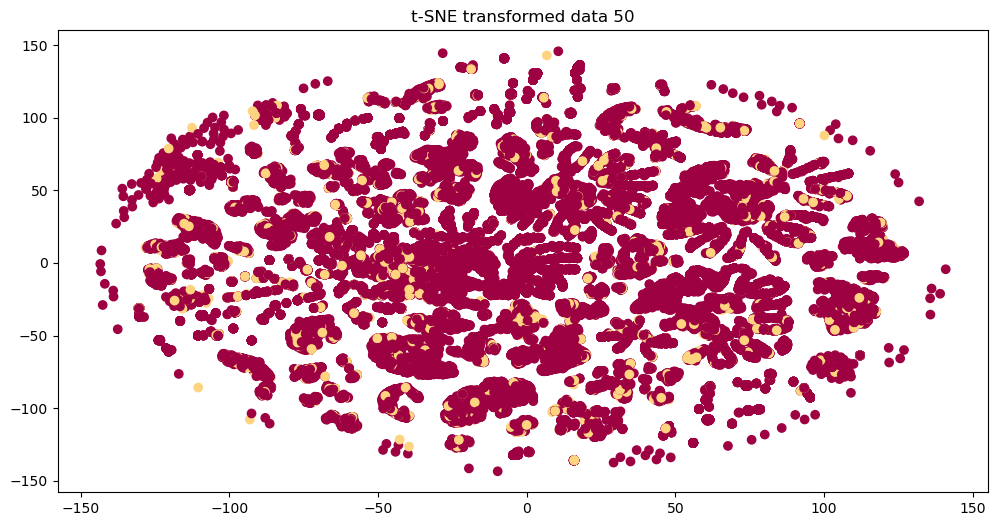

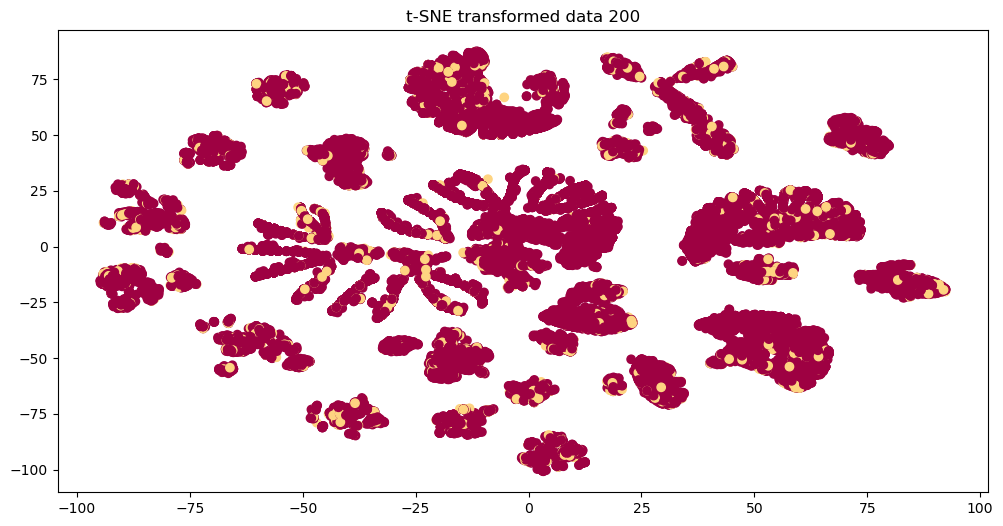

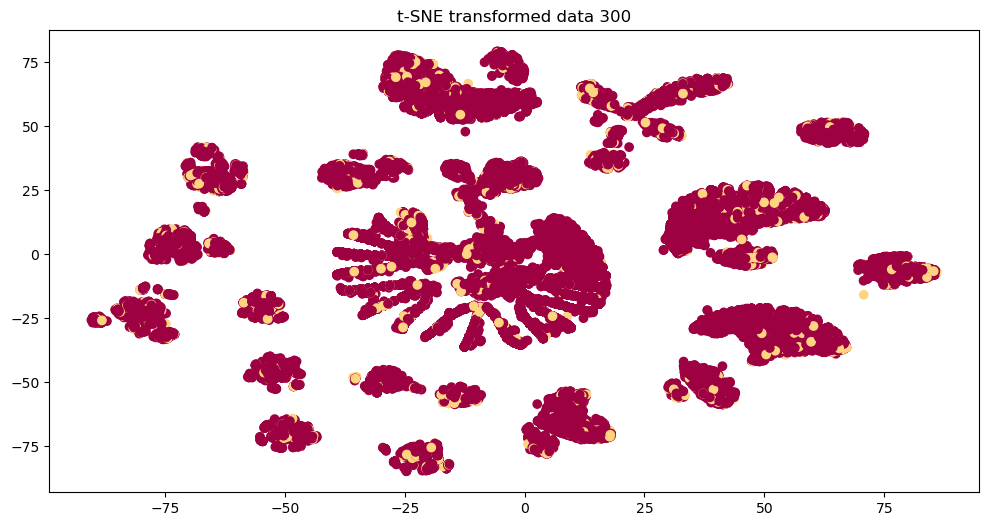

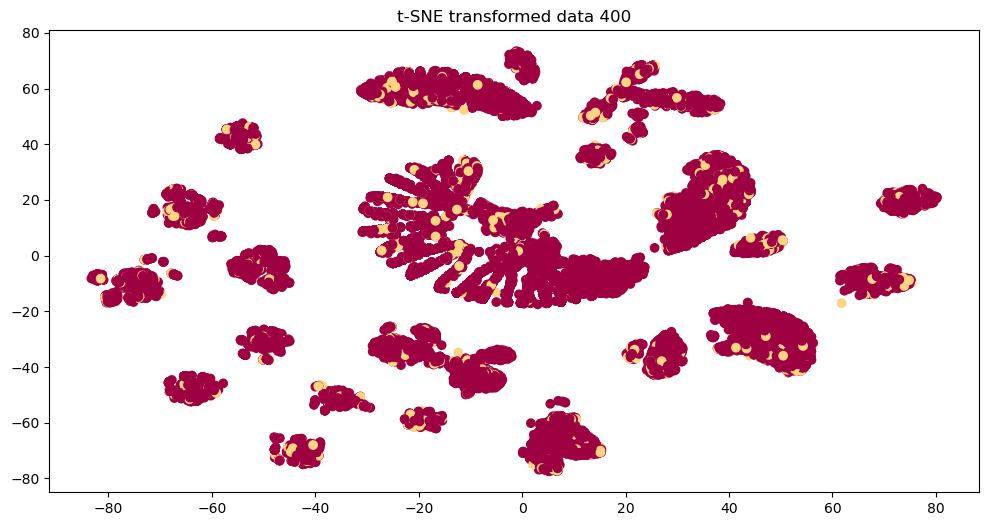

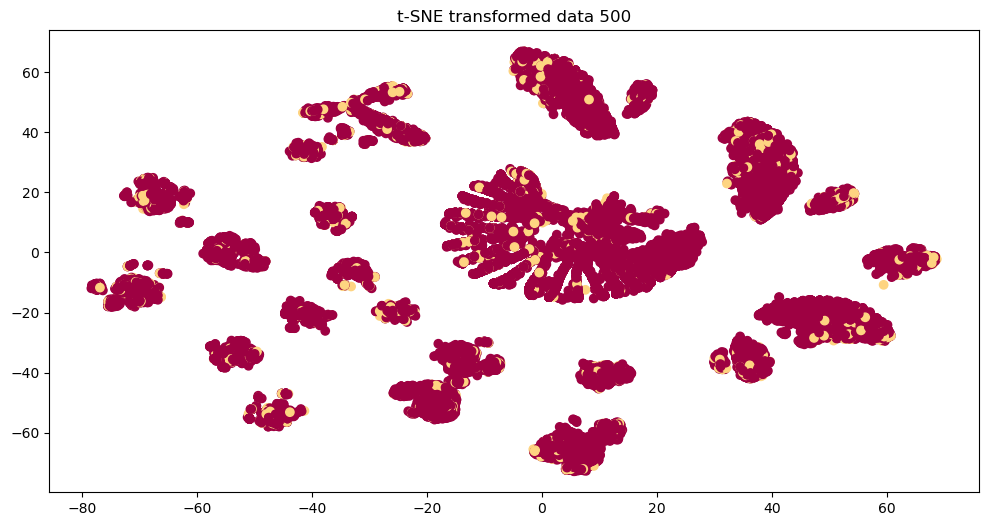

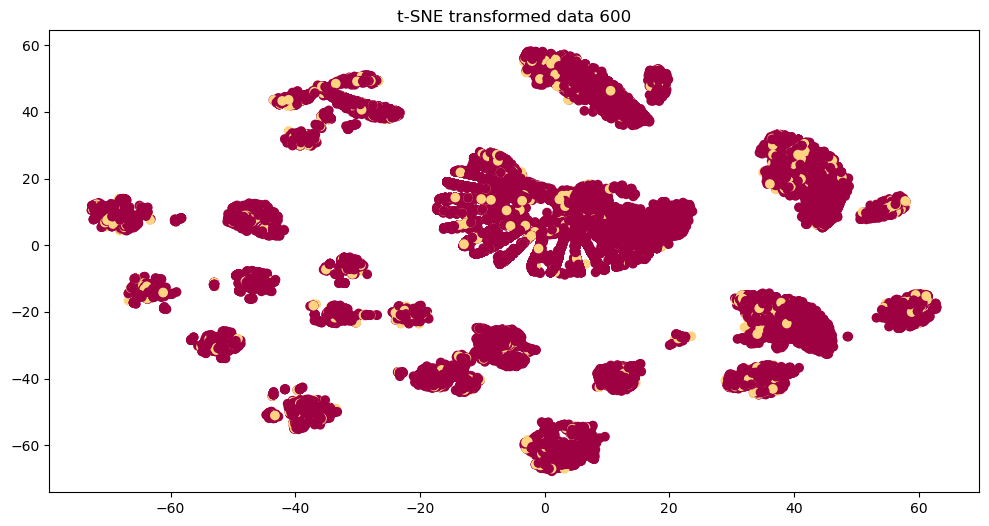

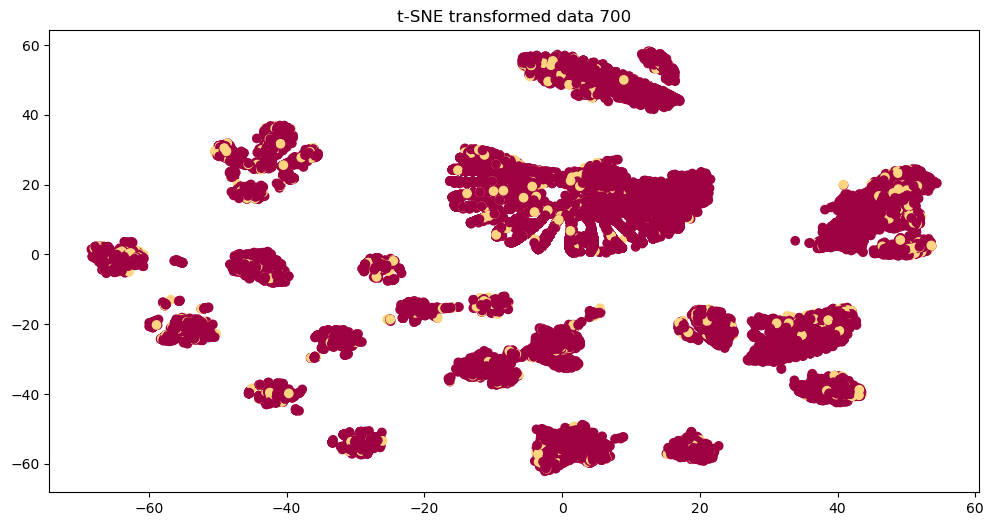

In [20]:
from sklearn.manifold import TSNE
from sklearn.metrics import f1_score
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

random_state = 42
prp_var = [50,200,300,400,500,600,700]
for i in prp_var:
    tsne = TSNE(n_components=2, init='random', random_state=random_state, perplexity=i,n_jobs=-1)
    X_proj = tsne.fit_transform(samples_norm)
    X_test_tsne = X_proj[-16260:]
    X_train_tsne = X_proj[:37772]
    print(X_test_tsne.shape)
    print(X_train_tsne.shape)
    X_proj = X_train_tsne

    fig = plt.figure(figsize=(12, 6))
    plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], \
            c=[cm.Spectral(float(i)*3 / 8) for i in y_train])
    plt.title("t-SNE transformed data " + str(i))

(16260, 2)
(37772, 2)
(16260, 2)
(37772, 2)
(16260, 2)
(37772, 2)
(16260, 2)
(37772, 2)
(16260, 2)
(37772, 2)
(16260, 2)
(37772, 2)


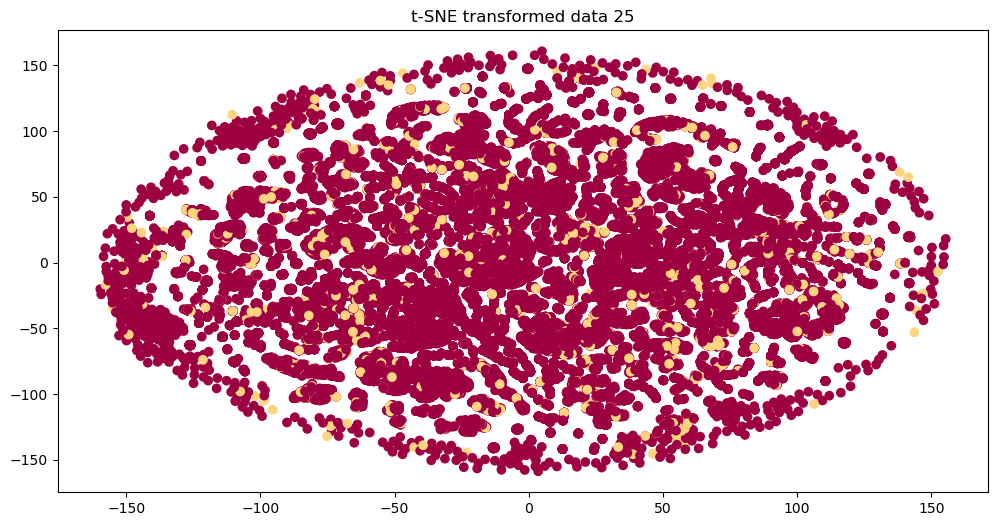

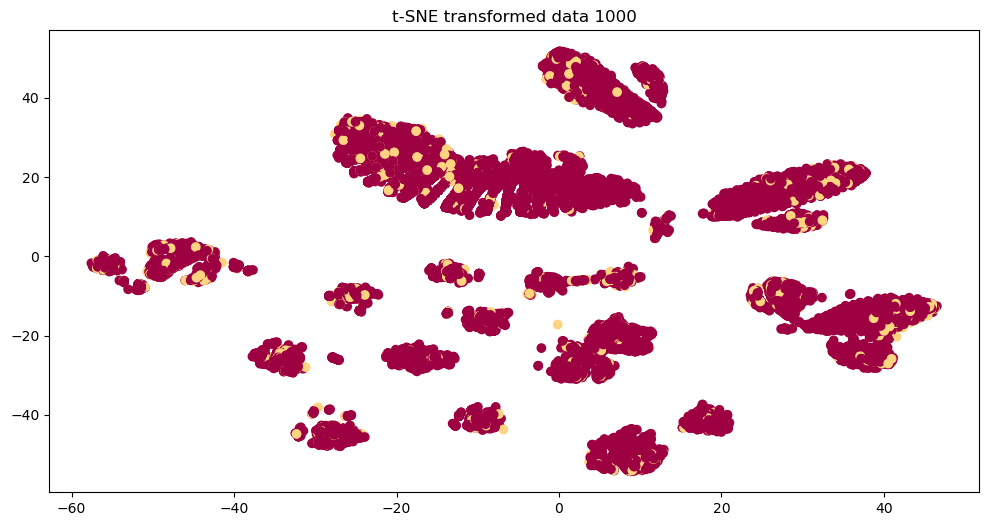

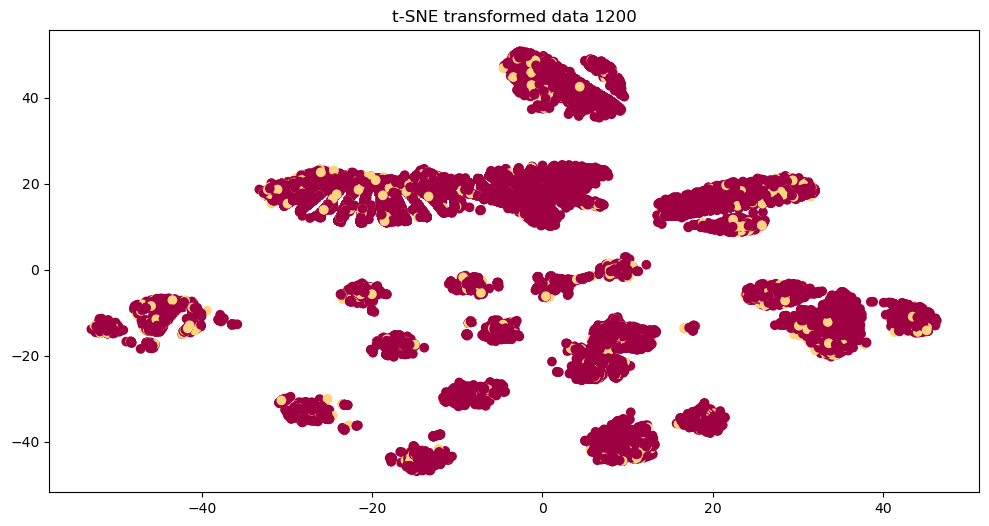

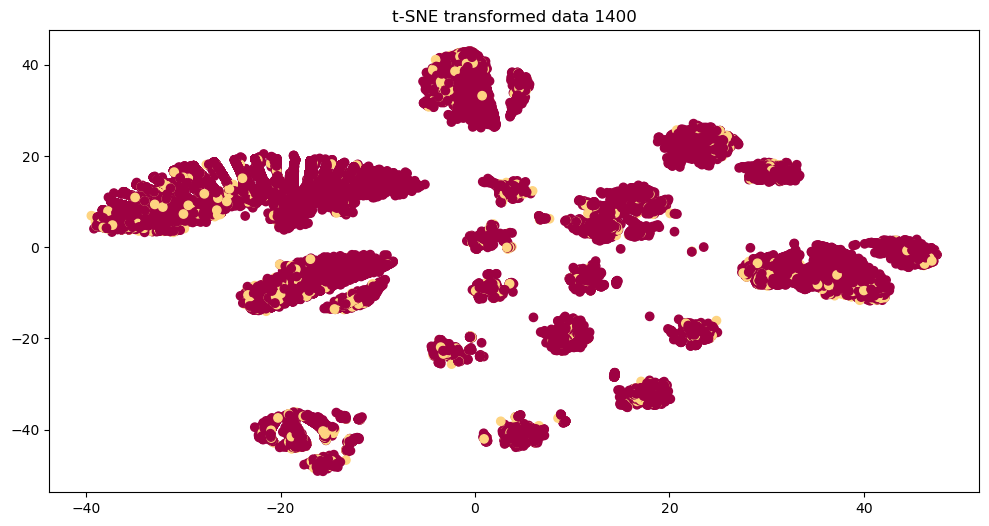

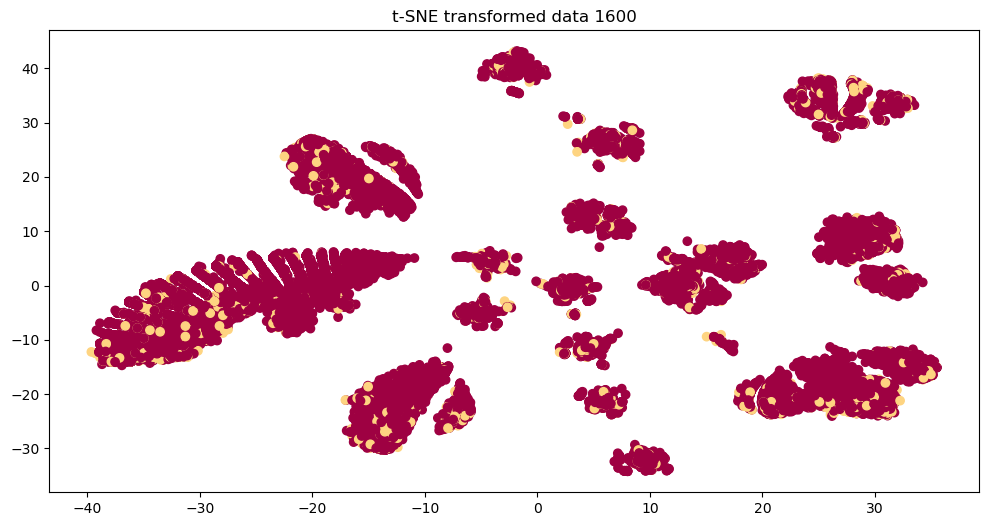

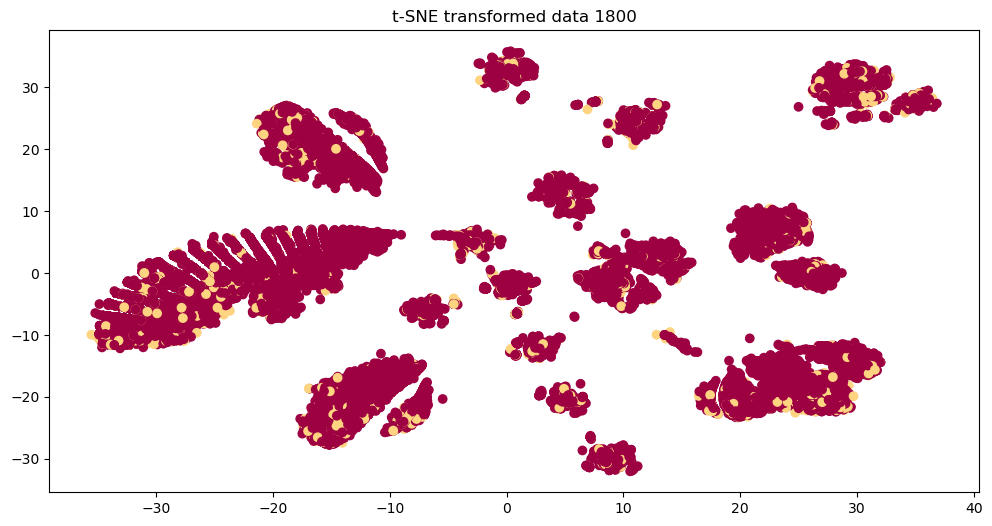

In [21]:
prp_var = [800,1000,1200,1400,1600,1800]
for i in prp_var:
    tsne = TSNE(n_components=2, init='random', random_state=random_state, perplexity=i,n_jobs=-1)
    X_proj = tsne.fit_transform(samples_norm)
    X_test_tsne = X_proj[-16260:]
    X_train_tsne = X_proj[:37772]
    print(X_test_tsne.shape)
    print(X_train_tsne.shape)
    X_proj = X_train_tsne

    fig = plt.figure(figsize=(12, 6))
    plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], \
            c=[cm.Spectral(float(i)*3 / 8) for i in y_train])
    plt.title("t-SNE transformed data " + str(i))

In [ ]:
prp_var = [2000,2400,2800]
random_state = 42
for i in prp_var:
    tsne = TSNE(n_components=2, init='random', random_state=random_state, perplexity=i,n_jobs=-1)
    X_proj = tsne.fit_transform(samples_norm)
    X_test_tsne = X_proj[-16260:]
    X_train_tsne = X_proj[:37772]
    print(X_test_tsne.shape)
    print(X_train_tsne.shape)
    X_proj = X_train_tsne

    fig = plt.figure(figsize=(12, 6))
    plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], \
            c=[cm.Spectral(float(i)*3 / 8) for i in y_train])
    plt.title("t-SNE transformed data " + str(i))

In [17]:
from sklearn.manifold import TSNE
from sklearn.metrics import f1_score
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

random_state = 42
prp_var = 1800

# # Transform  dimensional data to 2 dimensions
tsne = TSNE(n_components=2, init='random', random_state=random_state, perplexity=prp_var,n_jobs=-1)
X_proj = tsne.fit_transform(samples_norm)
X_test_tsne = X_proj[-16260:]
X_train_tsne = X_proj[:37772]
print(X_test_tsne.shape)
print(X_train_tsne.shape)
X_proj = X_train_tsne

(16260, 2)
(37772, 2)


Text(0.5, 1.0, 't-SNE Transformed Data, Perplexity = 1800')

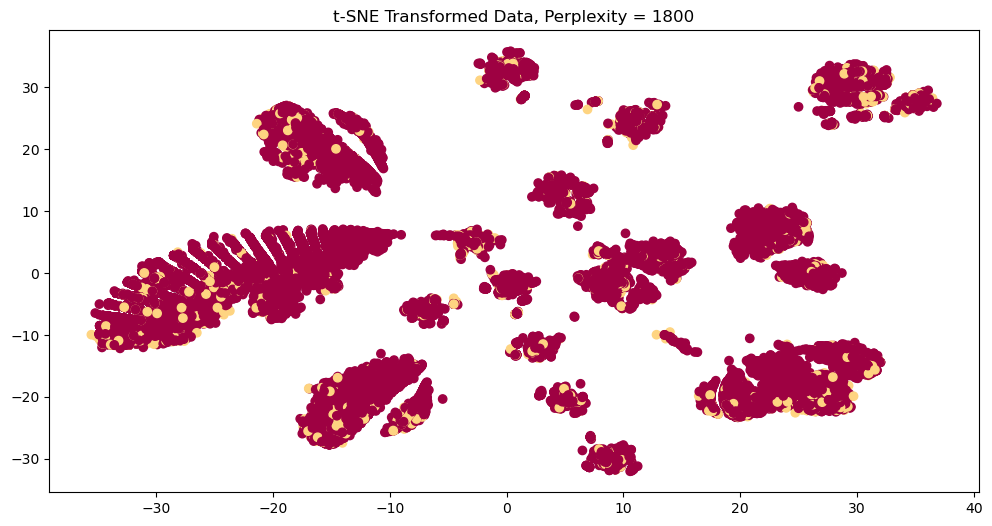

In [18]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], \
            c=[cm.Spectral(float(i)*3 / 8) for i in y_train])
plt.title("t-SNE Transformed Data, Perplexity = 1800")

In [19]:
y_train.reset_index(drop=True, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_14928\2069361224.py:17: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_train[mask])[0][0]


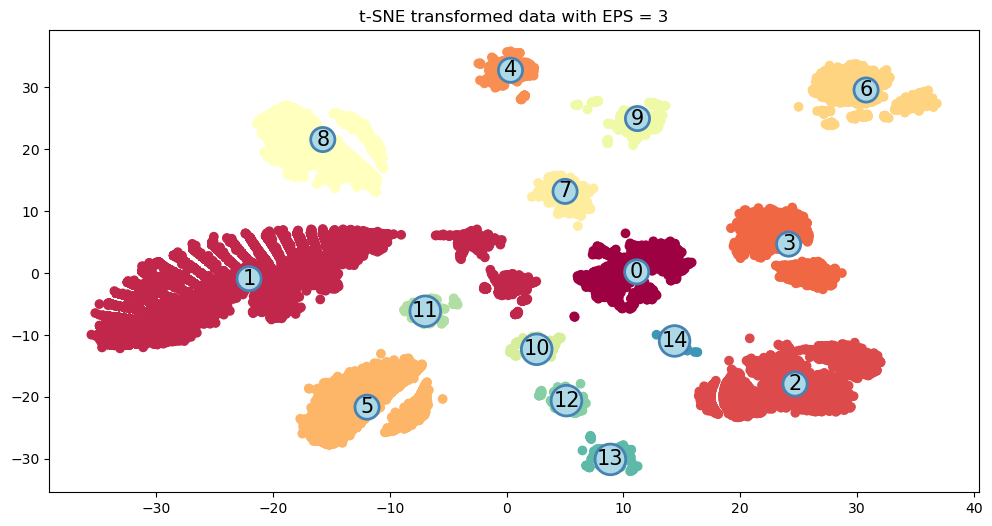

Number of clusters for eps=3: 16
F1 Score for eps=3: 0.9307158741925236


C:\Users\HP\AppData\Local\Temp\ipykernel_14928\2069361224.py:17: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_train[mask])[0][0]


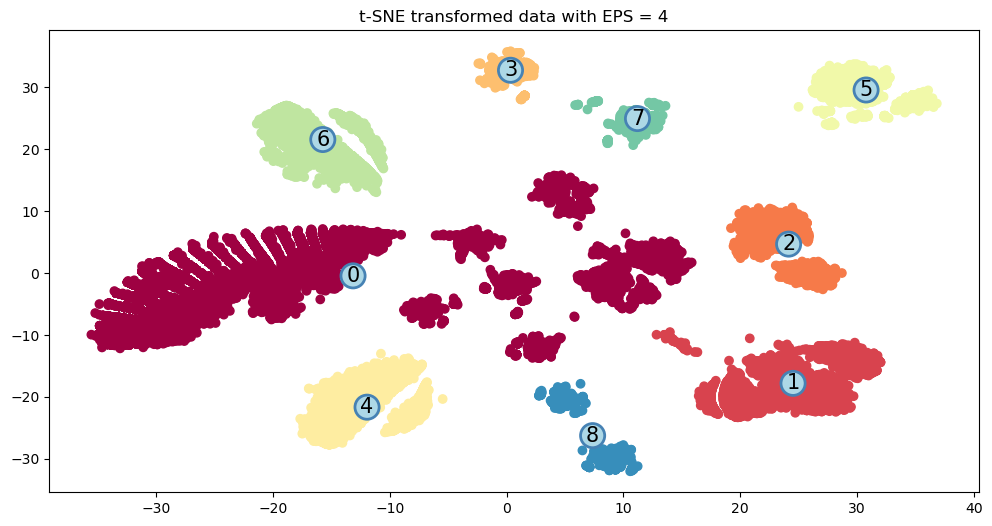

Number of clusters for eps=4: 9
F1 Score for eps=4: 0.9307158741925236


C:\Users\HP\AppData\Local\Temp\ipykernel_14928\2069361224.py:17: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_train[mask])[0][0]


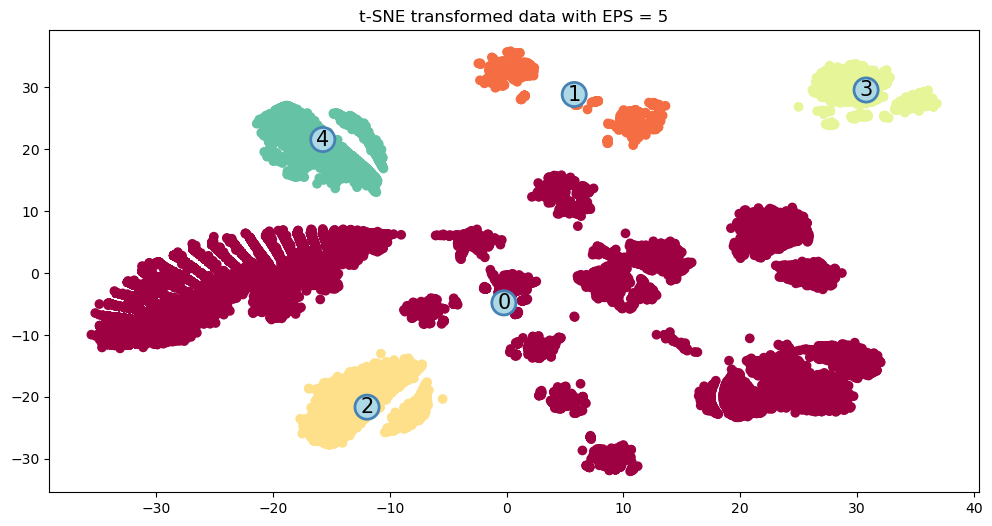

Number of clusters for eps=5: 5
F1 Score for eps=5: 0.9307158741925236


C:\Users\HP\AppData\Local\Temp\ipykernel_14928\2069361224.py:17: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_train[mask])[0][0]


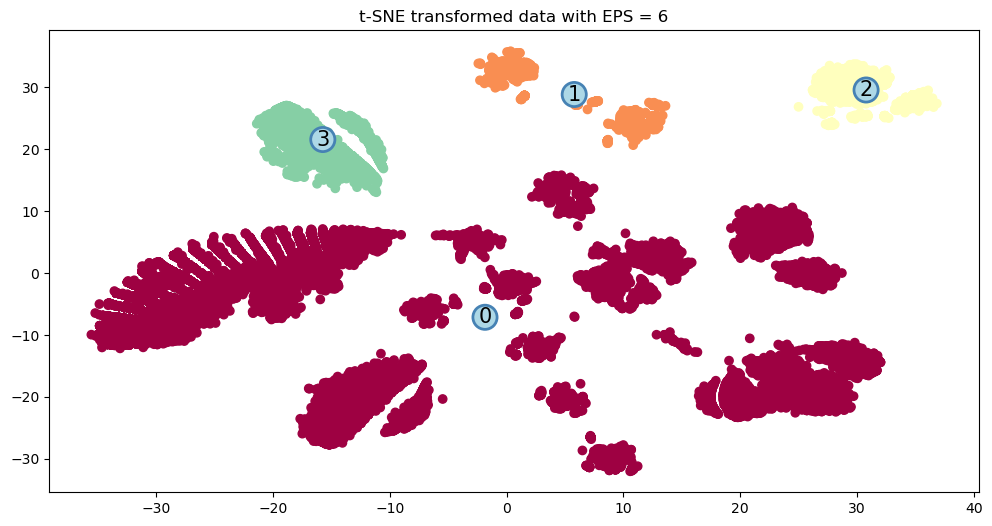

Number of clusters for eps=6: 4
F1 Score for eps=6: 0.9307158741925236


C:\Users\HP\AppData\Local\Temp\ipykernel_14928\2069361224.py:17: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_train[mask])[0][0]


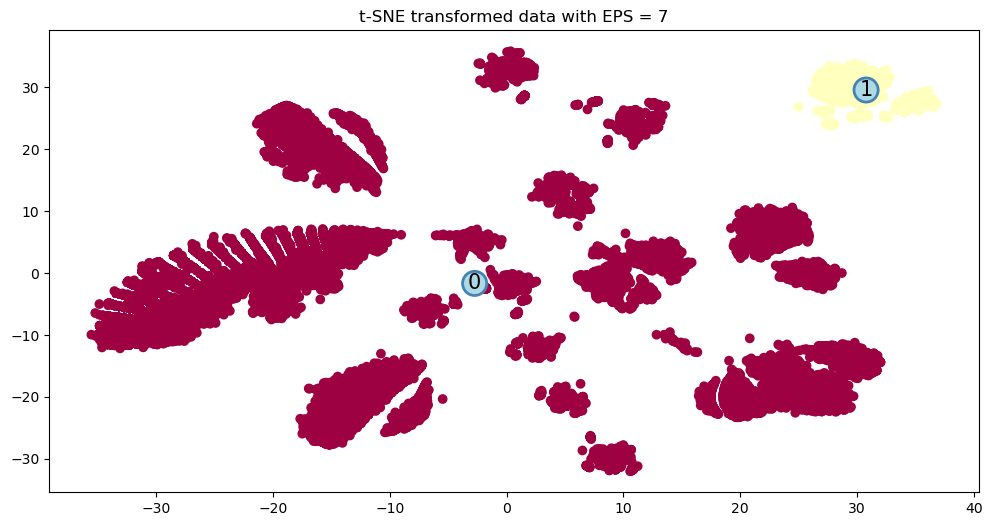

Number of clusters for eps=7: 2
F1 Score for eps=7: 0.9307158741925236


C:\Users\HP\AppData\Local\Temp\ipykernel_14928\2069361224.py:17: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_train[mask])[0][0]


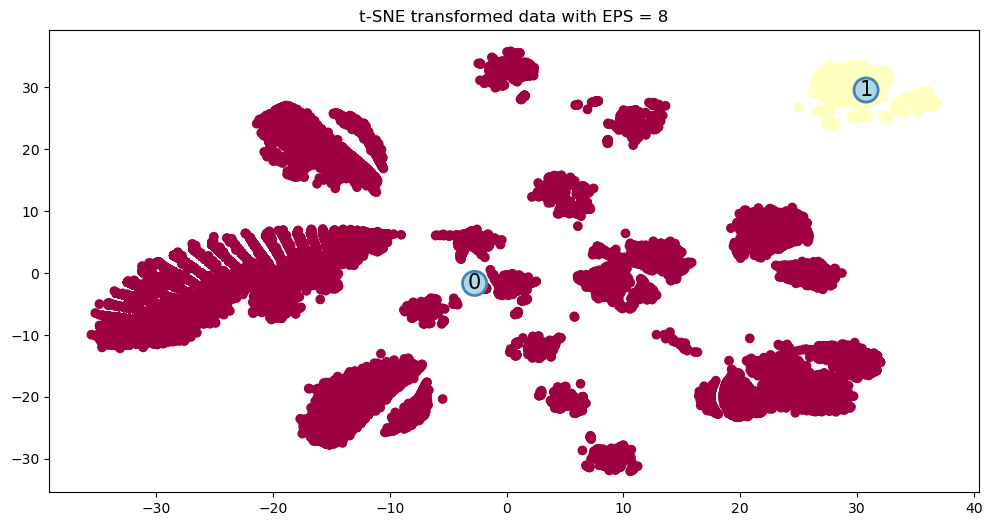

Number of clusters for eps=8: 2
F1 Score for eps=8: 0.9307158741925236


In [20]:
eps_values = [3, 4, 5, 6, 7, 8]

for eps in eps_values:
    dbs = DBSCAN(eps=eps)
    clusters = dbs.fit_predict(X_proj)

    # Calculate the unique clusters and their counts
    uq = np.unique(clusters)
    num_clusters = len(uq)

    # Permute the labels based on the mode of the original labels
    labels = np.zeros_like(clusters)
    for i in uq:  # Change range(10) to unique values in clusters to handle varying cluster numbers
        mask = (clusters == i)
        # Only assign a label if there are any points in the cluster
        if np.any(mask):
            labels[mask] = mode(y_train[mask])[0][0]

    # Plotting
    fig = plt.figure(figsize=(12, 6))
    plt.scatter(X_proj[:, 0], X_proj[:, 1], c=[cm.Spectral(float(i) / num_clusters) for i in clusters])
    plt.title(f"t-SNE transformed data with EPS = {eps}")
    
    # Calculate and annotate cluster centers
    centers = {}
    for i in uq:
        if i != -1:  # Skip noise points
            center = X_proj[clusters == i].mean(axis=0)
            centers[i] = center
            plt.text(center[0], center[1], str(i), ha="center", va="center", size=15,
                     bbox=dict(boxstyle="circle,pad=0.1", fc="lightblue", ec="steelblue", lw=2))
    
    plt.show()  # Show the plot for each value of eps

    # Print the number of clusters
    print(f"Number of clusters for eps={eps}: {num_clusters}")

    # Compute and print the F1 score
    f1 = f1_score(y_train, labels, average='micro')
    print(f"F1 Score for eps={eps}: {f1}")

C:\Users\HP\AppData\Local\Temp\ipykernel_14928\4037103225.py:20: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_train[mask])[0]


2


0.9307158741925236

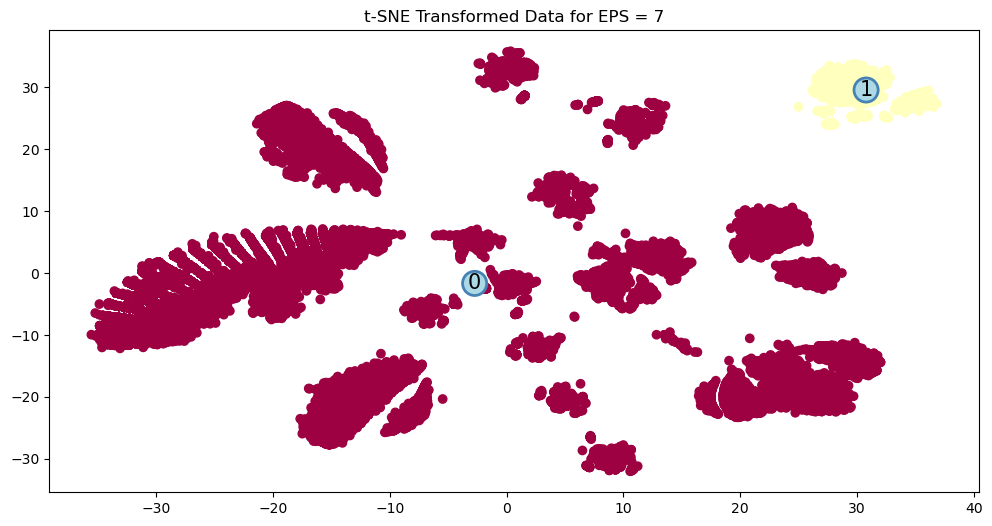

In [21]:
eps = 7

dbs = DBSCAN(eps = eps)

#X_proj = TSNE_DONE[perp][:8000]
clusters = dbs.fit_predict(X_proj)

uq = np.unique(clusters)
num_clusters = len(uq)



#plt.scatter(kmeans.cluster_centers_[:, 0], sc.cluster_centers_[:, 1], s=300, c='black')


# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(y_train[mask])[0]



fig = plt.figure(figsize=(12, 6))
plt.scatter(X_proj[:, 0], X_proj[:, 1], \
          c=[cm.Spectral(float(i) / num_clusters) for i in clusters])
plt.title("t-SNE Transformed Data for EPS = " + str(eps))
centers = {}
counts = {}
for i in uq:
    count = 0
    center = np.zeros(2)
    for c in range(0, len(clusters)):
        if (clusters[c] != i):
            continue
        count = count + 1
        center = center + X_proj[c]
    if (count > 0):
        counts[i] = count
        centers[i] = center / count

print(num_clusters)

for i in centers.keys():
    if i > 25:
        break
    loc = centers[i]
    plt.text(loc[0], loc[1], str(i), ha="center", va="center", size=15,
            bbox=dict(boxstyle="circle,pad=0.1",
                      fc="lightblue", ec="steelblue", lw=2))
  #plt.show()
# Compute the accuracy
f1_score(y_train, labels, average='micro')

In [22]:
unique_clusters = np.unique(clusters)


clu_defect = {i: 0 for i in unique_clusters}
clu_total = {i: 0 for i in unique_clusters}


for i, cluster_id in enumerate(clusters):
    if y_train[i]:  
        clu_defect[cluster_id] += 1
    clu_total[cluster_id] += 1

print(clu_total)
print(clu_defect)

# Calculate and print defect percentage for each actual cluster (excluding noise)
for i in unique_clusters:
    if i != -1:  # Skip noise
        total = clu_total[i]
        defect = clu_defect[i]
        defect_percentage = defect / total if total > 0 else 0 
        print(f"{i}th cluster has a total of {total} and a {defect_percentage:.2%} percentage to experience wealth shock")


clu_defect_perc = {i: (clu_defect[i] / clu_total[i] if clu_total[i] > 0 else 0) for i in unique_clusters if i != -1}
for i in sorted(clu_defect_perc.keys(), key=clu_defect_perc.get):
    print(f"{i}: {clu_defect_perc[i]:.2%}")

{0: 35029, 1: 2743}
{0: 2360, 1: 257}
0th cluster has a total of 35029 and a 6.74% percentage to experience waelth shock
1th cluster has a total of 2743 and a 9.37% percentage to experience waelth shock
0: 6.74%
1: 9.37%


In [24]:
print(sum(y_train)/37772)
print(sum(y_test)/16260)

0.06928412580747643
0.07011070110701106


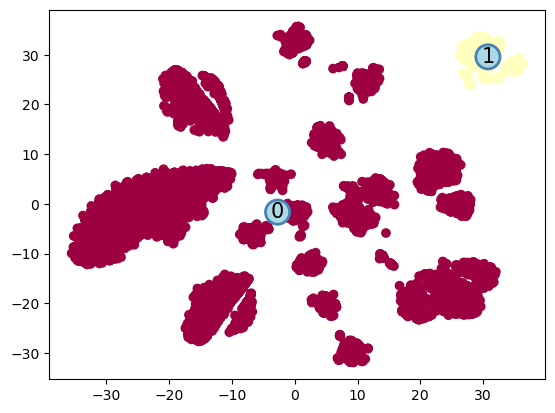

In [25]:
test_clusters = []

#X_test_tsne = TSNE_DONE[perp][-2000:]

for i in X_test_tsne:
    min = np.linalg.norm(X_train_tsne[0] - i)
    value = 0
    for j in range(0,len(X_train_tsne)):
        if np.linalg.norm(X_train_tsne[j] - i) >= min:
            continue
        min = np.linalg.norm(X_train_tsne[j] - i)
        value = j
    test_clusters.append(clusters[value])
test_clusters = np.array(test_clusters)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], \
          c=[cm.Spectral(float(i) / num_clusters) for i in test_clusters])
for i in centers.keys():
    if i > 25:
        break
    loc = centers[i]
    plt.text(loc[0], loc[1], str(i), ha="center", va="center", size=15,
            bbox=dict(boxstyle="circle,pad=0.1",
                      fc="lightblue", ec="steelblue", lw=2))

In [28]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [31]:
other_train.reset_index(drop=True, inplace=True)
other_test.reset_index(drop=True, inplace=True)

In [32]:
X_train_clusters = X_train.copy()
X_train_clusters["cluster"] = clusters
Shock_train_clusters = pd.concat([X_train_clusters, y_train, other_train], axis=1)
Shock_train_clusters

,AGE,HEALTH_CHANGE,HBP,DIABETES,CANCER,LUNGS,HEART_ATTACK,STROKE,PSYCH,ARTHRITIS,OUT_PT,DRUGS,HOME_CARE,SPECIAL_FAC,HOSPITAL,DOCTOR,NURSING_HOME,cluster,SHOCK2,percent_increase,WEIGHT,percent_increase,LAST_YEAR,SPEND_SS,SHOCK2,HHIDPN
0,66,0,0,0,0,0,0,0,0,0,0,1,1,0,4,12,0,0,0,0.513,4132.0,0.513,0.810471,1.226103,0,3020
1,68,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18,0,0,0,0.495,4210.0,0.495,1.226103,1.207260,0,3020
2,70,1,0,0,0,0,0,0,0,0,1,1,0,0,0,15,0,0,1,1.245,4436.0,1.245,1.207260,3.296803,1,3020
3,72,0,0,0,0,0,0,0,0,0,1,1,0,1,1,13,0,0,0,0.273,4846.0,0.273,3.296803,1.087224,0,3020
4,74,0,1,0,0,0,1,0,0,0,1,1,0,1,3,24,0,0,0,0.007,4968.0,0.007,1.087224,0.443857,0,3020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37767,72,0,0,0,0,0,0,0,0,0,0,1,0,0,1,40,0,0,0,-0.004,1950.0,-0.004,0.828884,1.100518,0,918096020
37768,65,-2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-0.868,1206.0,-0.868,0.544580,0.071614,0,920275020
37769,67,1,0,0,0,0,0,0,0,0,0,1,0,0,0,7,0,0,0,-0.159,1309.0,-0.159,0.071614,0.112669,0,920275020
37770,69,1,0,0,0,0,0,0,0,0,1,1,0,0,0,6,0,0,0,-0.020,1515.0,-0.020,0.112669,0.199811,0,920275020


In [33]:
X_test_clusters = X_test.copy()
X_test_clusters["cluster"] = test_clusters
Shock_test_clusters = pd.concat([X_test_clusters, y_test, other_test], axis=1)
Shock_test_clusters

,AGE,HEALTH_CHANGE,HBP,DIABETES,CANCER,LUNGS,HEART_ATTACK,STROKE,PSYCH,ARTHRITIS,OUT_PT,DRUGS,HOME_CARE,SPECIAL_FAC,HOSPITAL,DOCTOR,NURSING_HOME,cluster,SHOCK2,percent_increase,WEIGHT,percent_increase,LAST_YEAR,SPEND_SS,SHOCK2,HHIDPN
0,66,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,1,4.591,4056.0,4.591,0.099617,0.556942,1,3010
1,68,0,0,0,0,0,0,0,0,0,0,1,0,0,0,9,0,0,0,0.024,4067.0,0.024,0.556942,0.359641,0,3010
2,70,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0.020,4093.0,0.020,0.359641,0.399938,0,3010
3,72,0,0,0,0,0,0,0,0,0,0,1,0,0,3,4,0,0,0,-0.039,4287.0,-0.039,0.399938,0.132259,0,3010
4,74,0,0,0,0,0,0,0,0,0,0,1,0,0,0,31,0,0,0,0.017,4806.0,0.017,0.132259,0.442117,0,3010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16255,74,0,1,0,0,0,0,0,0,0,0,1,0,0,0,12,0,0,0,-0.034,5874.0,-0.034,0.336338,0.089432,0,907226020
16256,71,0,0,0,1,0,0,0,0,0,0,1,0,0,0,6,0,0,0,-0.924,1741.0,-0.924,0.129893,0.009935,0,907380020
16257,73,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,0,0,0,-0.043,2105.0,-0.043,0.009935,0.057814,0,907380020
16258,75,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,-0.055,1964.0,-0.055,0.057814,0.033265,0,907380020


In [34]:
clu_test_defect = {i:0 for i in range(0,num_clusters)}
clu_test_total = {i:0 for i in range(0,num_clusters)}
for i in range(0,len(test_clusters)):
    if y_test[i]:
        clu_test_defect[test_clusters[i]] += 1
    clu_test_total[test_clusters[i]] += 1

print(clu_test_total)
print(clu_test_defect)

for i in range(num_clusters):
    print("{:d}th cluster is: ".format(i))
    print(X_test.iloc[i])
    print("And has a total of {:d} and a {:f} chance to experience wealth shock".format(clu_test_total[i],clu_test_defect[i]/clu_test_total[i]))
    print("-------------------------------------------------")



clu_test_defect_perc = {i:(clu_test_defect[i]/clu_test_total[i]) for i in range(0,num_clusters)}
for i in (sorted(clu_test_defect_perc.keys(), key=clu_test_defect_perc.get)):
    print("{:d}: {:f}".format(i, clu_test_defect_perc[i]))

print("--------------------")

for i in clu_test_defect_perc.keys():
    print("{:d}: {:f}".format(i, clu_defect_perc[i] - clu_test_defect_perc[i]))

{0: 15035, 1: 1225}
{0: 1022, 1: 118}
0th cluster is: 
AGE              66
HEALTH_CHANGE    -1
HBP               0
DIABETES          0
CANCER            0
LUNGS             0
HEART_ATTACK      0
STROKE            0
PSYCH             0
ARTHRITIS         0
OUT_PT            0
DRUGS             1
HOME_CARE         0
SPECIAL_FAC       0
HOSPITAL          0
DOCTOR            2
NURSING_HOME      0
Name: 0, dtype: int64
And has a total of 15035 and a 0.067975 chance to experience wealth shock
-------------------------------------------------
1th cluster is: 
AGE              68
HEALTH_CHANGE     0
HBP               0
DIABETES          0
CANCER            0
LUNGS             0
HEART_ATTACK      0
STROKE            0
PSYCH             0
ARTHRITIS         0
OUT_PT            0
DRUGS             1
HOME_CARE         0
SPECIAL_FAC       0
HOSPITAL          0
DOCTOR            9
NURSING_HOME      0
Name: 1, dtype: int64
And has a total of 1225 and a 0.096327 chance to experience wealth shock
-------

In [35]:
c_train_data = []

for i in range(num_clusters):
    c_train_data.append(Shock_train_clusters[Shock_train_clusters["cluster"] == i].drop("cluster",axis=1))

for i in range(len(c_train_data)):
    print("CLUSTER {:d}".format(i))
    display(c_train_data[i])
    print("-" * 3600)

CLUSTER 0


,AGE,HEALTH_CHANGE,HBP,DIABETES,CANCER,LUNGS,HEART_ATTACK,STROKE,PSYCH,ARTHRITIS,OUT_PT,DRUGS,HOME_CARE,SPECIAL_FAC,HOSPITAL,DOCTOR,NURSING_HOME,SHOCK2,percent_increase,WEIGHT,percent_increase,LAST_YEAR,SPEND_SS,SHOCK2,HHIDPN
0,66,0,0,0,0,0,0,0,0,0,0,1,1,0,4,12,0,0,0.513,4132.0,0.513,0.810471,1.226103,0,3020
1,68,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18,0,0,0.495,4210.0,0.495,1.226103,1.207260,0,3020
2,70,1,0,0,0,0,0,0,0,0,1,1,0,0,0,15,0,1,1.245,4436.0,1.245,1.207260,3.296803,1,3020
3,72,0,0,0,0,0,0,0,0,0,1,1,0,1,1,13,0,0,0.273,4846.0,0.273,3.296803,1.087224,0,3020
4,74,0,1,0,0,0,1,0,0,0,1,1,0,1,3,24,0,0,0.007,4968.0,0.007,1.087224,0.443857,0,3020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37767,72,0,0,0,0,0,0,0,0,0,0,1,0,0,1,40,0,0,-0.004,1950.0,-0.004,0.828884,1.100518,0,918096020
37768,65,-2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-0.868,1206.0,-0.868,0.544580,0.071614,0,920275020
37769,67,1,0,0,0,0,0,0,0,0,0,1,0,0,0,7,0,0,-0.159,1309.0,-0.159,0.071614,0.112669,0,920275020
37770,69,1,0,0,0,0,0,0,0,0,1,1,0,0,0,6,0,0,-0.020,1515.0,-0.020,0.112669,0.199811,0,920275020


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

,AGE,HEALTH_CHANGE,HBP,DIABETES,CANCER,LUNGS,HEART_ATTACK,STROKE,PSYCH,ARTHRITIS,OUT_PT,DRUGS,HOME_CARE,SPECIAL_FAC,HOSPITAL,DOCTOR,NURSING_HOME,SHOCK2,percent_increase,WEIGHT,percent_increase,LAST_YEAR,SPEND_SS,SHOCK2,HHIDPN
7,68,-1,0,0,0,0,0,0,0,0,1,0,0,1,0,8,0,0,0.244,5465.0,0.244,0.037382,0.180110,0,10004040
8,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0.126,5836.0,0.126,0.180110,0.257887,0,10004040
25,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,1,1.996,4945.0,1.996,0.036381,0.108986,1,10059030
79,72,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,4,0,0,0.451,5856.0,0.451,1.808035,0.568987,0,10477020
80,74,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.069,6006.0,0.069,0.568987,0.460731,0,10477020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37739,73,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4,0,0,0.012,2270.0,0.012,0.169306,0.088629,0,907283020
37748,72,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,1.192,1492.0,1.192,0.047311,0.103692,1,910041020
37760,71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.189,1872.0,-0.189,0.079937,0.064810,0,914149020
37761,73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,-0.064,2246.0,-0.064,0.064810,0.053875,0,914149020


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

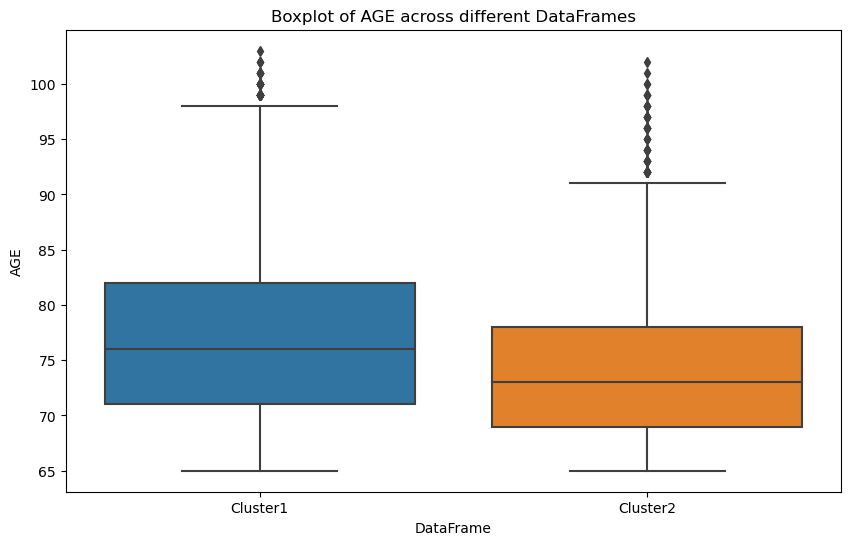

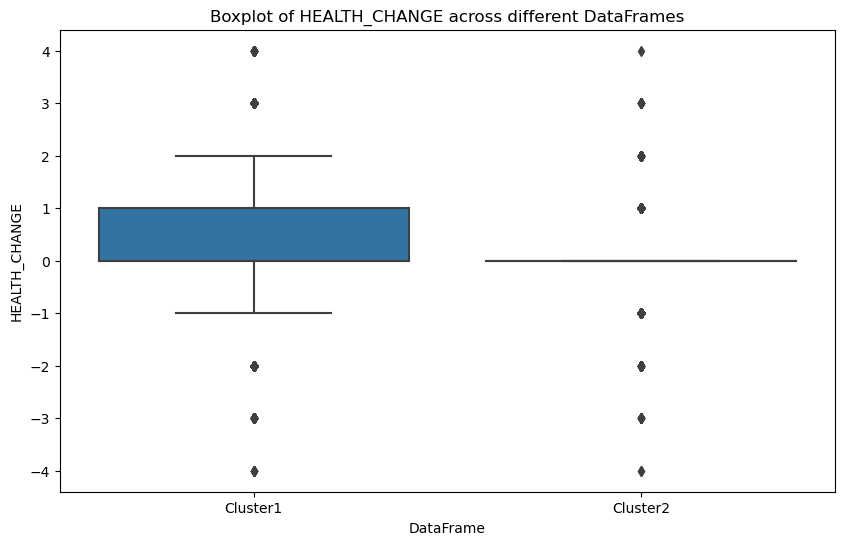

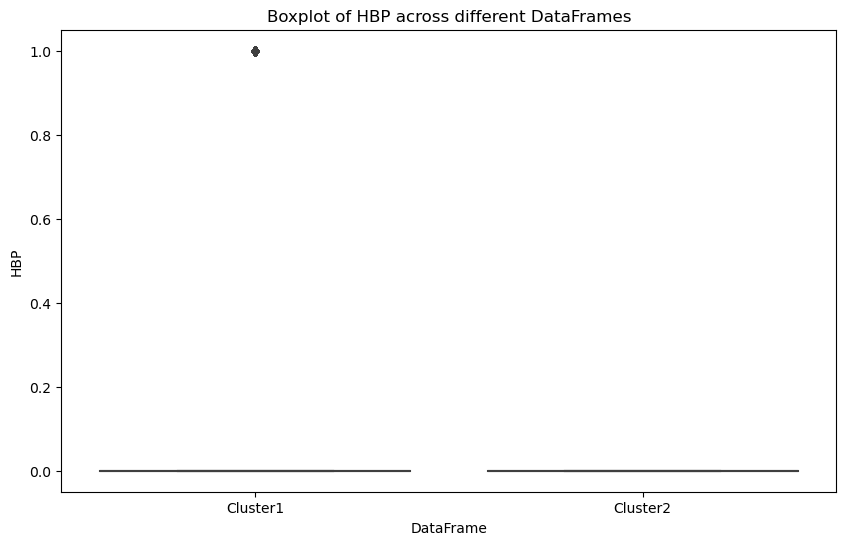

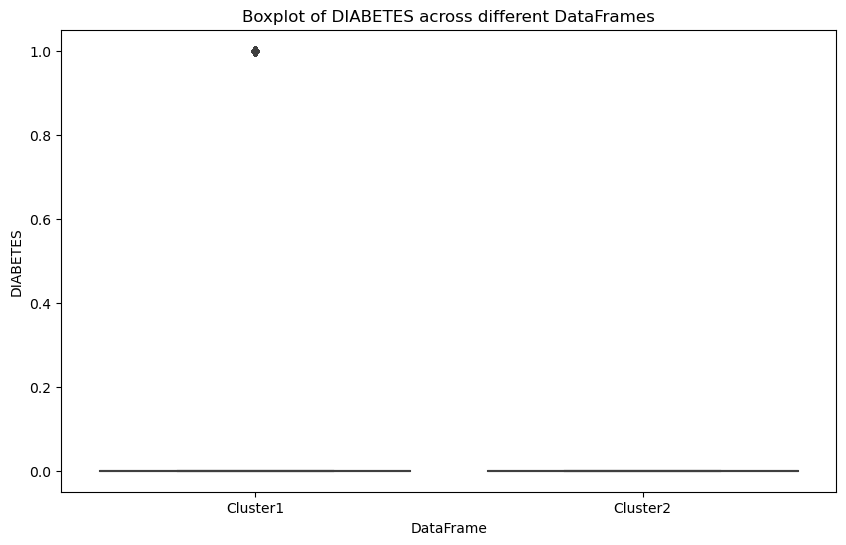

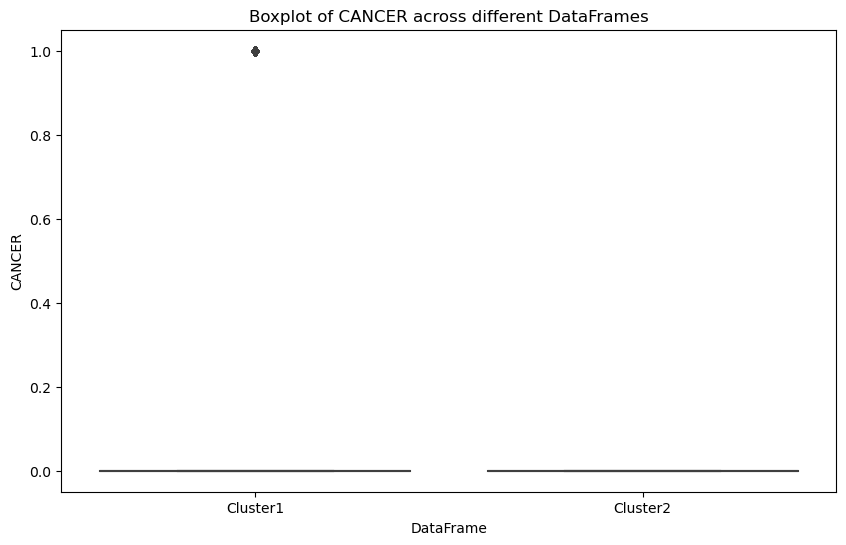

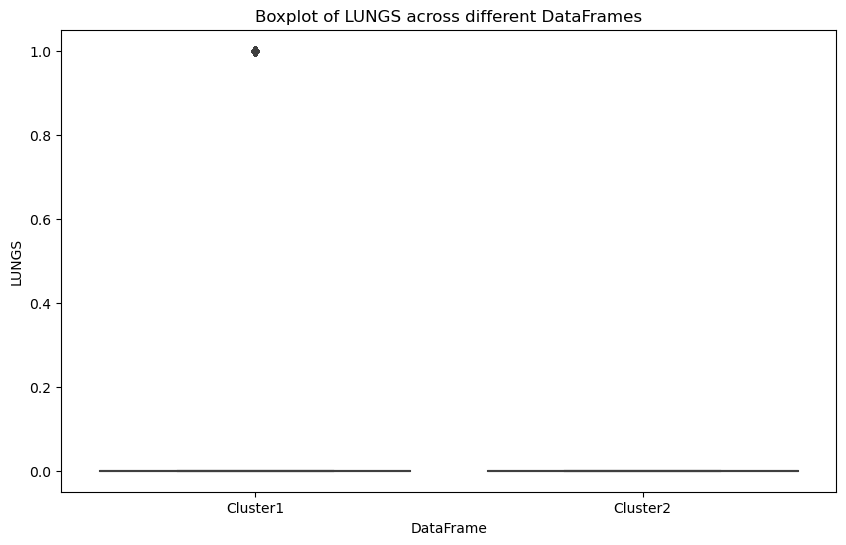

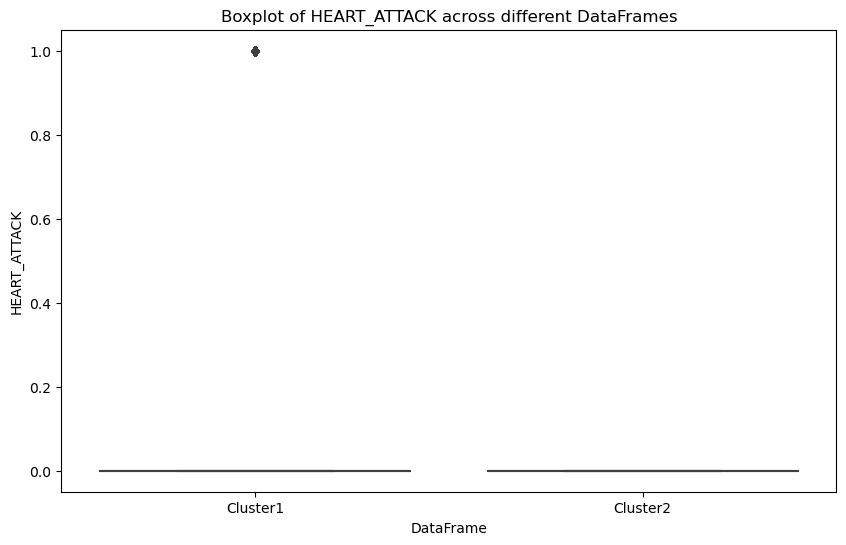

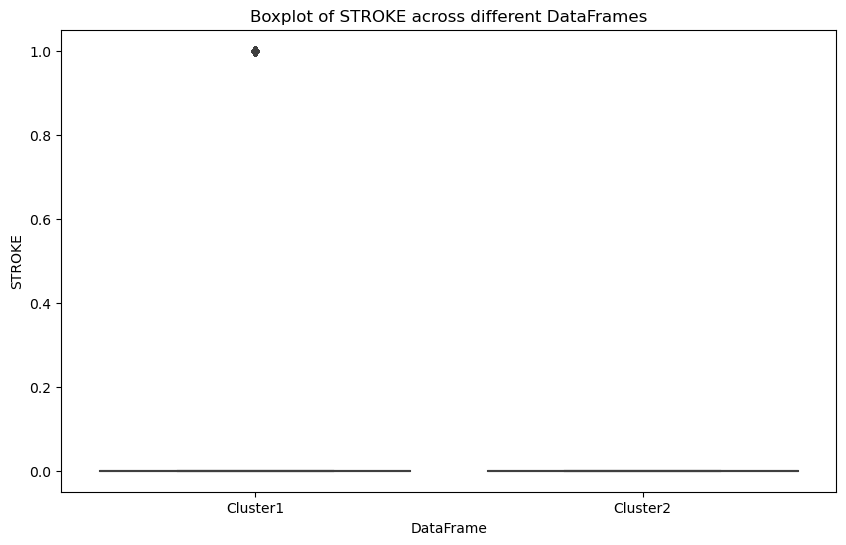

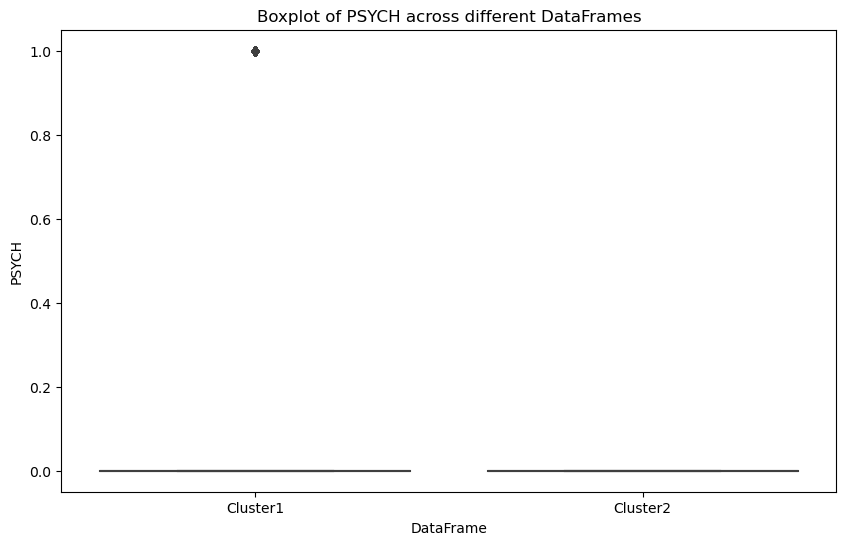

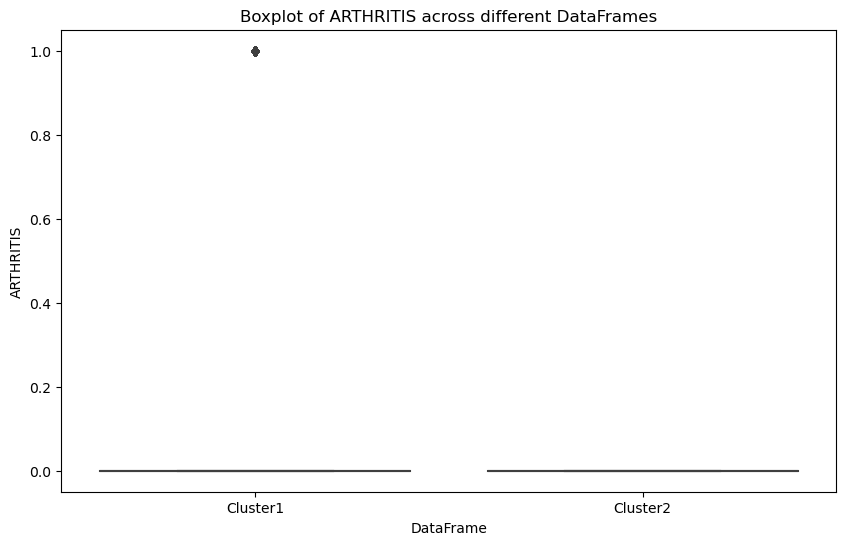

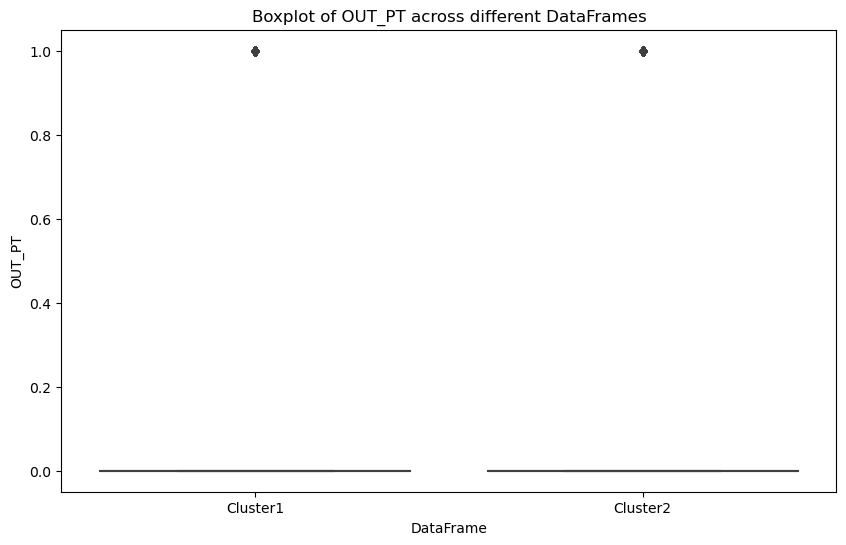

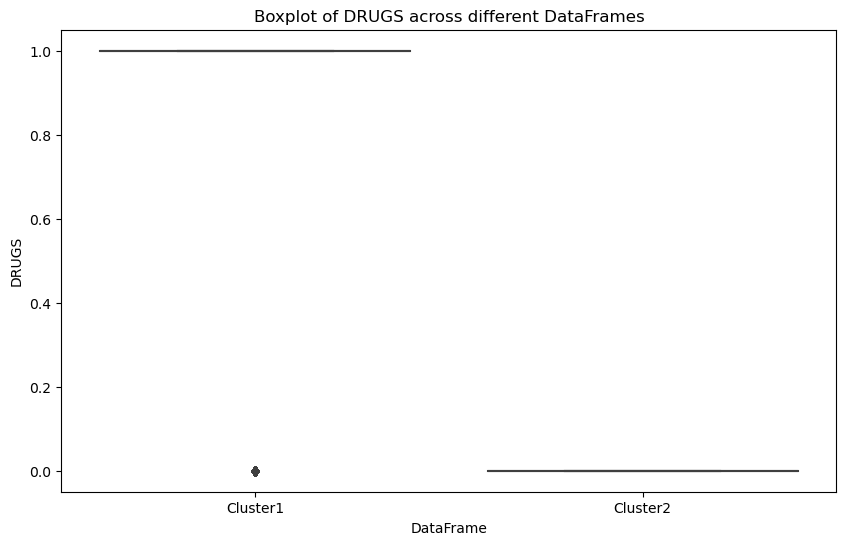

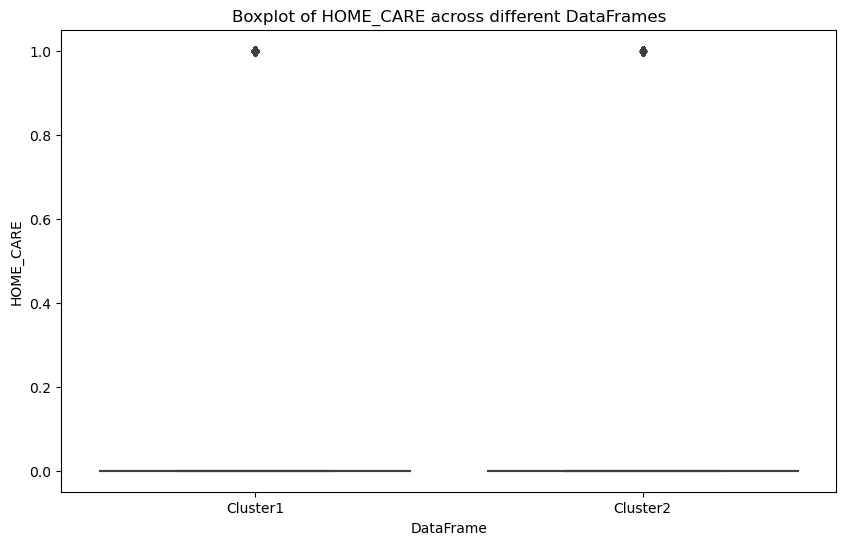

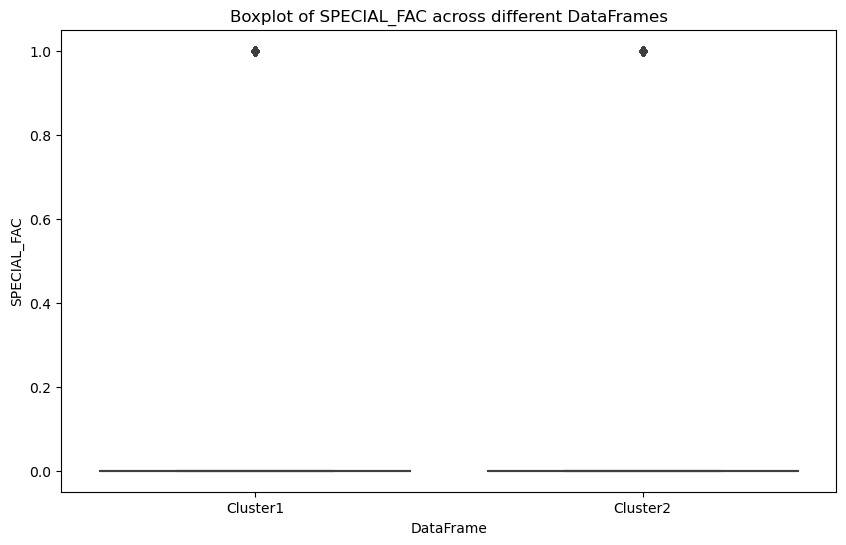

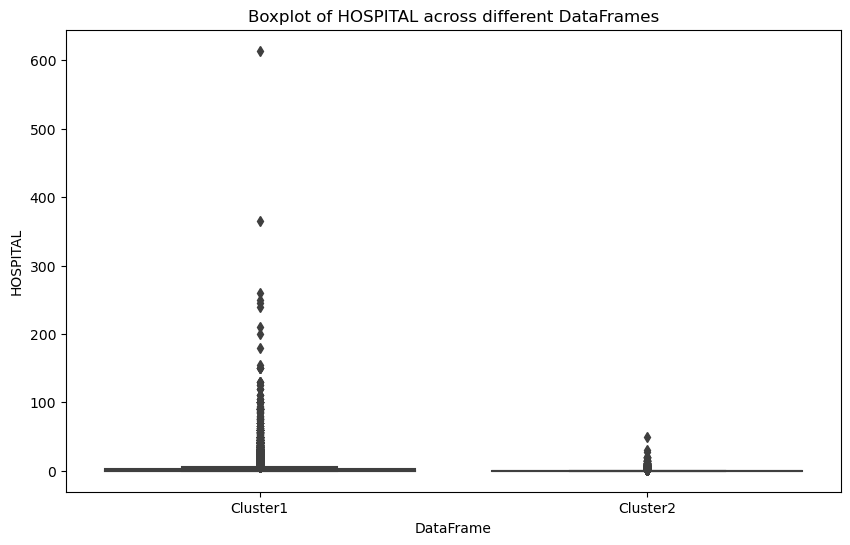

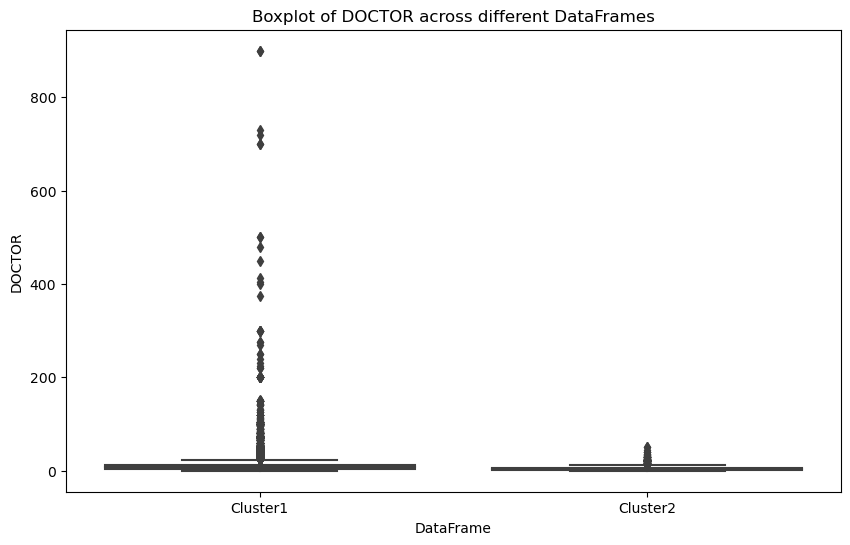

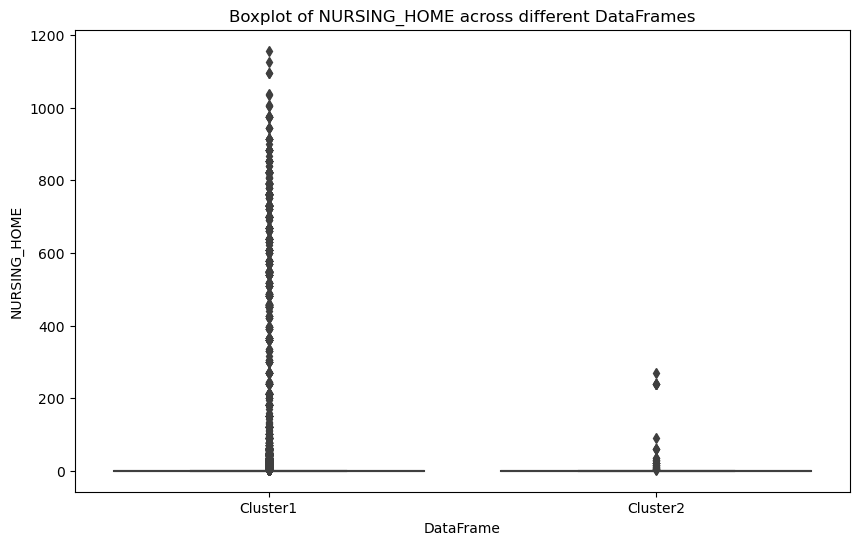

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 1000x600 with 0 Axes>

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

columns = c_train_data[0].columns

for col in columns:
    combined_df = pd.DataFrame()
    
    for i, df in enumerate(c_train_data):
        temp_df = df[[col]].copy()
        temp_df['DataFrame'] = f'Cluster{i+1}'
        combined_df = pd.concat([combined_df, temp_df], ignore_index=True)
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='DataFrame', y=col, data=combined_df)
    plt.title(f'Boxplot of {col} across different DataFrames')
    plt.show()

In [41]:
df_names = ['Low', 'High']  
columns = c_train_data[0].columns
means_df = pd.DataFrame(index=columns, columns=df_names)

for col in columns:
    for name, df in zip(df_names, c_train_data):
        means_df.loc[col, name] = df[col].mean()

print(means_df)

                              Low              High
AGE                     76.818379         74.403208
HEALTH_CHANGE            0.101516          0.029165
HBP                      0.042108               0.0
DIABETES                 0.024094               0.0
CANCER                   0.026007               0.0
LUNGS                    0.016329               0.0
HEART_ATTACK             0.043136               0.0
STROKE                   0.021753               0.0
PSYCH                    0.018042               0.0
ARTHRITIS                0.039653               0.0
OUT_PT                   0.245083          0.177543
DRUGS                    0.990779               0.0
HOME_CARE                0.103543          0.029894
SPECIAL_FAC              0.152616          0.069267
HOSPITAL                 2.383511          0.567991
DOCTOR                  10.513318          4.488881
NURSING_HOME            11.471866          0.691214
SHOCK2                   0.067373          0.093693
percent_incr

In [ ]:
#High cluster has a total of 785 and a 2.17% percentage to experience wealth shock

#Medium cluster has a total of 27466 and a 1.11% percentage to experience wealth shock

#Low cluster has a total of 6993 and a 0.46% percentage to experience wealth shock

#Age are very similar across all three clsuters
#High cluster experience significantly more drastic health declines and hospitalizations than medium cluster, the same applies to medium and low clusters
#Low cluster has none of the specified diseases
#High cluster has cancer rate of 100%
#Home care, Cancer and HBP are the most significant factors differentiating high, mdeium and low clusters

In [44]:
c_train_data[0].to_csv('Low_train.csv', index=False)
c_train_data[1].to_csv('High_train.csv', index=False)

In [ ]:
from scipy.spatial import distance_matrix
from skbio import DistanceMatrix
from skbio.stats.distance import permanova
from skbio.stats.distance import anosim

In [42]:
c_test_data = []

for i in range(num_clusters):
    c_test_data.append(Shock_test_clusters[Shock_test_clusters["cluster"] == i].drop("cluster",axis=1))

for i in range(len(c_test_data)):
    print("CLUSTER {:d}".format(i))
    display(c_test_data[i])
    print("-" * 3600)

CLUSTER 0


,AGE,HEALTH_CHANGE,HBP,DIABETES,CANCER,LUNGS,HEART_ATTACK,STROKE,PSYCH,ARTHRITIS,OUT_PT,DRUGS,HOME_CARE,SPECIAL_FAC,HOSPITAL,DOCTOR,NURSING_HOME,SHOCK2,percent_increase,WEIGHT,percent_increase,LAST_YEAR,SPEND_SS,SHOCK2,HHIDPN
0,66,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,1,4.591,4056.0,4.591,0.099617,0.556942,1,3010
1,68,0,0,0,0,0,0,0,0,0,0,1,0,0,0,9,0,0,0.024,4067.0,0.024,0.556942,0.359641,0,3010
2,70,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0.020,4093.0,0.020,0.359641,0.399938,0,3010
3,72,0,0,0,0,0,0,0,0,0,0,1,0,0,3,4,0,0,-0.039,4287.0,-0.039,0.399938,0.132259,0,3010
4,74,0,0,0,0,0,0,0,0,0,0,1,0,0,0,31,0,0,0.017,4806.0,0.017,0.132259,0.442117,0,3010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16255,74,0,1,0,0,0,0,0,0,0,0,1,0,0,0,12,0,0,-0.034,5874.0,-0.034,0.336338,0.089432,0,907226020
16256,71,0,0,0,1,0,0,0,0,0,0,1,0,0,0,6,0,0,-0.924,1741.0,-0.924,0.129893,0.009935,0,907380020
16257,73,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,0,0,-0.043,2105.0,-0.043,0.009935,0.057814,0,907380020
16258,75,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0,0,-0.055,1964.0,-0.055,0.057814,0.033265,0,907380020


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

,AGE,HEALTH_CHANGE,HBP,DIABETES,CANCER,LUNGS,HEART_ATTACK,STROKE,PSYCH,ARTHRITIS,OUT_PT,DRUGS,HOME_CARE,SPECIAL_FAC,HOSPITAL,DOCTOR,NURSING_HOME,SHOCK2,percent_increase,WEIGHT,percent_increase,LAST_YEAR,SPEND_SS,SHOCK2,HHIDPN
88,66,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,1,2.175,5219.0,2.175,0.015489,0.049186,1,11141020
90,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,-0.098,4989.0,-0.098,0.037248,0.004012,0,11141020
128,70,0,0,0,0,0,0,0,0,0,1,0,0,0,0,10,0,0,-0.042,4111.0,-0.042,0.012399,0.027476,0,11575020
129,72,0,0,0,0,0,0,0,0,0,1,0,0,0,0,8,0,0,0.199,3727.0,0.199,0.027476,0.167459,0,11575020
131,76,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.027,3899.0,-0.027,0.379508,0.003673,0,11575020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16202,73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,-0.178,5223.0,-0.178,0.067850,0.017399,0,213439010
16241,68,0,0,0,0,0,0,0,0,0,0,0,0,0,5,10,0,0,-0.106,4678.0,-0.106,0.502396,0.152781,0,903248020
16242,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,-0.083,5087.0,-0.083,0.152781,0.057659,0,903248020
16244,72,1,0,0,0,0,0,0,0,0,0,0,0,1,0,4,0,0,-0.789,3897.0,-0.789,0.075760,0.015989,0,906069020


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [43]:
df_names = ['Low', 'High']  
columns = c_test_data[0].columns
means_df = pd.DataFrame(index=columns, columns=df_names)

for col in columns:
    for name, df in zip(df_names, c_test_data):
        means_df.loc[col, name] = df[col].mean()

print(means_df)

                               Low              High
AGE                      77.044097         74.499592
HEALTH_CHANGE             0.098237          0.037551
HBP                       0.042301               0.0
DIABETES                  0.024011               0.0
CANCER                    0.027469               0.0
LUNGS                     0.017759               0.0
HEART_ATTACK              0.042966               0.0
STROKE                    0.022015               0.0
PSYCH                     0.015896               0.0
ARTHRITIS                 0.040173               0.0
OUT_PT                    0.249884          0.198367
DRUGS                      0.99122               0.0
HOME_CARE                  0.09837          0.022857
SPECIAL_FAC               0.150582          0.062857
HOSPITAL                  2.233588          0.379592
DOCTOR                   10.730362          4.116735
NURSING_HOME             12.070103          0.233469
SHOCK2                    0.067975          0.

In [45]:
c_test_data[0].to_csv('Low_test.csv', index=False)
c_test_data[1].to_csv('High_test.csv', index=False)

In [ ]:
sample_size = 5000
if len(X_train_norm) > sample_size:
    indices = np.random.choice(len(X_train_norm), size=sample_size, replace=False)
    X_train_sampled = X_train_norm[indices]
else:
    X_train_sampled = X_train_norm

In [ ]:
dm_sampled = DistanceMatrix(distance_matrix(X_train_sampled, X_train_sampled))
clusters_sampled = clusters[indices]
result_anosim = anosim(dm_sampled, clusters_sampled)
print(result_anosim)

In [ ]:
result_permanova = permanova(dm_sampled, clusters_sampled)
print(result_permanova)